# *`Mini Project 2 – Consumer Complaint Resolution Analysis Using Python`*

## Consumer Complaint Resolution Analysis

**Scenario:**

Product review is the most basic function/factor in resolving customer issues and increasing the sales growth of any product. We can understand their mindset toward our service without asking each customer.
When consumers are unhappy with some aspect of a business, they reach out to customer service and might raise a complaint. Companies try their best to resolve the complaints that they receive. However, it might not always be possible to appease every customer.

So Here, we will analyze data, and with the help of different algorithms, we are finding the best classification of customer category so that we can predict our test data.

**Objective:**

Use Python libraries such as Pandas for data operations, Seaborn and Matplotlib for data visualization and EDA tasks, Sklearn for model building and performance visualization, and based on the best model, make a prediction for the test file and save the output.

The main objective is to predict whether our customer is disputed or not with the help of given data.

\
**Dataset description:**

Customers faced some issues and tried to report their problems to customer care.
Dispute: This is our target variable based on train data; we have two groups, one with a dispute with the bank and another don’t have any issue with the bank.
Date received: The day complaint was received.

\
1. **Product:** different products offered by the bank (credit cards, debit cards, different types of transaction methods, accounts, locker services, and money-related)

2. **Sub-product:** loan, insurance, other mortgage options

3. **Issue:** Complaint of customers

4. **Company public response:** Company’s response to consumer complaint

5. **Company:** Company name

6. **State:** State where the customer lives (different state of USA)

7. **ZIP code:** Where the customer lives

8. **Submitted via:** Register complaints via different platforms (online web, phone, referral, fax, post mail)

9. **Date sent to company:** The day complaint was registered

10. **Timely response?:** Yes/no

11. **Consumer disputed?:** yes/no (target variable)

12. **Complaint ID:** unique to each consumer

In [1]:
!wget -O Datasets.zip https://github.com/krutika-shimpi/Edureka_Internship_Assigments_solved/raw/main/Mini_project_2/Datasets.zip

--2024-03-15 13:57:58--  https://github.com/krutika-shimpi/Edureka_Internship_Assigments_solved/raw/main/Mini_project_2/Datasets.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/krutika-shimpi/Edureka_Internship_Assigments_solved/main/Mini_project_2/Datasets.zip [following]
--2024-03-15 13:57:58--  https://raw.githubusercontent.com/krutika-shimpi/Edureka_Internship_Assigments_solved/main/Mini_project_2/Datasets.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44916049 (43M) [application/zip]
Saving to: ‘Datasets.zip’

Datasets.zip        100%[===================>]  42.83M  89.3MB/s    in 0

In [2]:
# Lets extract the downloaded file
import zipfile

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('Datasets.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [44]:
# Make all the necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

### Import the data

In [4]:
# Lets load the data in the pandas DataFrame
consumer_data_train = pd.read_csv('/content/Consumer_Complaints_train.csv', parse_dates = ['Date received', 'Date sent to company'])
consumer_data_test = pd.read_csv('/content/Consumer_Complaints_test.csv', parse_dates = ['Date received', 'Date sent to company'])

# View the data
consumer_data_train.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


### Check the data

In [5]:
# Check the data types
consumer_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358810 entries, 0 to 358809
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date received                 358810 non-null  datetime64[ns]
 1   Product                       358810 non-null  object        
 2   Sub-product                   255024 non-null  object        
 3   Issue                         358810 non-null  object        
 4   Sub-issue                     139436 non-null  object        
 5   Consumer complaint narrative  56180 non-null   object        
 6   Company public response       67931 non-null   object        
 7   Company                       358810 non-null  object        
 8   State                         355907 non-null  object        
 9   ZIP code                      355899 non-null  object        
 10  Tags                          50226 non-null   object        
 11  Consumer cons

In [6]:
consumer_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119606 entries, 0 to 119605
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date received                 119606 non-null  datetime64[ns]
 1   Product                       119606 non-null  object        
 2   Sub-product                   84923 non-null   object        
 3   Issue                         119606 non-null  object        
 4   Sub-issue                     46356 non-null   object        
 5   Consumer complaint narrative  18914 non-null   object        
 6   Company public response       22460 non-null   object        
 7   Company                       119606 non-null  object        
 8   State                         118670 non-null  object        
 9   ZIP code                      118669 non-null  object        
 10  Tags                          16977 non-null   object        
 11  Consumer cons

### Perform missing value analysis and drop columns where more than 25% of data are missing

In [7]:
# Check the missing values in the data and drop columns where missing data is more than 25%
print('TRAINING DATA: with Missing data greater than 25%\n')
for column in consumer_data_train.columns:
  missing_percentage = consumer_data_train[column].isnull().sum() / len(consumer_data_train)
  if missing_percentage > 0.25:
    print(f"{column} -> {np.round(missing_percentage, 2) * 100}%")

TRAINING DATA: with Missing data greater than 25%

Sub-product -> 28.999999999999996%
Sub-issue -> 61.0%
Consumer complaint narrative -> 84.0%
Company public response -> 81.0%
Tags -> 86.0%
Consumer consent provided? -> 72.0%


In [8]:
# Check the missing values in the data and drop columns where missing data is more than 25%
print('TESTING DATA: with Missing data greater than 25%\n')
for column in consumer_data_test.columns:
  missing_percentage = consumer_data_test[column].isnull().sum() / len(consumer_data_test)
  if missing_percentage > 0.25:
    print(f"{column} -> {np.round(missing_percentage, 2) * 100}%")

TESTING DATA: with Missing data greater than 25%

Sub-product -> 28.999999999999996%
Sub-issue -> 61.0%
Consumer complaint narrative -> 84.0%
Company public response -> 81.0%
Tags -> 86.0%
Consumer consent provided? -> 72.0%


In [9]:
# Drop these columns from Training data frame
consumer_data_train.drop(['Sub-product', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Tags', 'Consumer consent provided?'], axis = 1, inplace = True)
consumer_data_train.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


In [10]:
# Drop the columns from testing data
consumer_data_test.drop(['Sub-product', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Tags', 'Consumer consent provided?'], axis = 1, inplace = True)
consumer_data_test.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667


In [11]:
# Check the missing data again after dropping the columns
consumer_data_train.isnull().sum()

Date received                      0
Product                            0
Issue                              0
Company                            0
State                           2903
ZIP code                        2911
Submitted via                      0
Date sent to company               0
Company response to consumer       0
Timely response?                   0
Consumer disputed?                 0
Complaint ID                       0
dtype: int64

In [12]:
# Check the missing data again after dropping the columns
consumer_data_test.isnull().sum()

Date received                     0
Product                           0
Issue                             0
Company                           0
State                           936
ZIP code                        937
Submitted via                     0
Date sent to company              0
Company response to consumer      0
Timely response?                  0
Complaint ID                      0
dtype: int64

Let's handle the remaining missing values further..

In [13]:
# Extracting Day, Month, and Year from Date Received Column and create new fields for a month, year, and day
def extract_date(df, date_column):
  df['Day'] = df[date_column].dt.day
  df['Month'] = df[date_column].dt.month
  df['Year'] = df[date_column].dt.year

  return df

# Extract dates from train dataframe
consumer_data_train = extract_date(df = consumer_data_train,
                                   date_column = 'Date received')

# Extract dates from test dataframe
consumer_data_test = extract_date(df = consumer_data_test,
                                  date_column = 'Date received')

consumer_data_train.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Day,Month,Year
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,14,10,2015
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,26,4,2015
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,20,12,2013
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,3,3,2016
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,30,1,2015


In [14]:
# Calculate the Number of Days the Complaint was with the Company
consumer_data_train['Days held'] = (consumer_data_train['Date sent to company'] - consumer_data_train['Date received']).dt.days
consumer_data_test['Days held'] = (consumer_data_test['Date sent to company'] - consumer_data_test['Date received']).dt.days

consumer_data_train.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Day,Month,Year,Days held
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,14,10,2015,0
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,26,4,2015,0
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,20,12,2013,14
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,3,3,2016,1
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,30,1,2015,0


In [15]:
# Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID" fields
consumer_data_train.drop(["Date received","Date sent to company","ZIP code", "Complaint ID"],
                         axis = 1,
                         inplace = True)

consumer_data_test.drop(["Date received","Date sent to company","ZIP code", "Complaint ID"],
                        axis = 1,
                        inplace = True)

consumer_data_train.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Day,Month,Year,Days held
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,14,10,2015,0
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,26,4,2015,0
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,20,12,2013,14
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,3,3,2016,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,30,1,2015,0


In [16]:
consumer_data_train.shape, consumer_data_test.shape

((358810, 12), (119606, 11))

In [17]:
# Define ColumnTransformer to impute null values in 'State' column by mode
column_transform = ColumnTransformer(
    transformers=[('imputer',
                   SimpleImputer(strategy='most_frequent'),
                    ['State'])],
    remainder = 'passthrough')

# Store data of disputed people into the “disputed_cons” variable for future tasks
train_labels = consumer_data_train['Consumer disputed?']

# Transform the column in the train data and convert it into a pandas dataframe
train_data = pd.DataFrame(data = column_transform.fit_transform(consumer_data_train.drop('Consumer disputed?', axis = 1)),
                          columns = (consumer_data_train.drop('Consumer disputed?', axis = 1)).columns)

# Do the same for test data
test_data = pd.DataFrame(data = column_transform.transform(consumer_data_test),
                         columns = consumer_data_test.columns)

In [18]:
train_data.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Day,Month,Year,Days held
0,GA,Credit reporting,Incorrect information on credit report,Equifax,Web,Closed with explanation,Yes,14,10,2015,0
1,GA,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,Web,Closed with explanation,Yes,26,4,2015,0
2,SC,Credit card,Other,Citibank,Phone,Closed with non-monetary relief,Yes,20,12,2013,14
3,OH,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",Referral,Closed with explanation,Yes,3,3,2016,1
4,CA,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",Web,Closed with explanation,Yes,30,1,2015,0


In [19]:
train_labels.head()

0     No
1    Yes
2     No
3     No
4    Yes
Name: Consumer disputed?, dtype: object

In [20]:
# Calculate the week based on the day of receiving in train and test data
train_data['Week received'] = train_data['Day'].apply(lambda day: (day - 1) // 7 + 1)
test_data['Week received'] = test_data['Day'].apply(lambda day: (day - 1) // 7 + 1)

train_data.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Day,Month,Year,Days held,Week received
0,GA,Credit reporting,Incorrect information on credit report,Equifax,Web,Closed with explanation,Yes,14,10,2015,0,2
1,GA,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,Web,Closed with explanation,Yes,26,4,2015,0,4
2,SC,Credit card,Other,Citibank,Phone,Closed with non-monetary relief,Yes,20,12,2013,14,3
3,OH,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",Referral,Closed with explanation,Yes,3,3,2016,1,1
4,CA,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",Web,Closed with explanation,Yes,30,1,2015,0,5


## Let's Vizualize the data

### Plot bar graph of the total no of disputes of consumers with the help of seaborn

In [21]:
consumer_data_train.rename(columns={'Consumer disputed?': 'consumer_disputes'}, inplace=True)

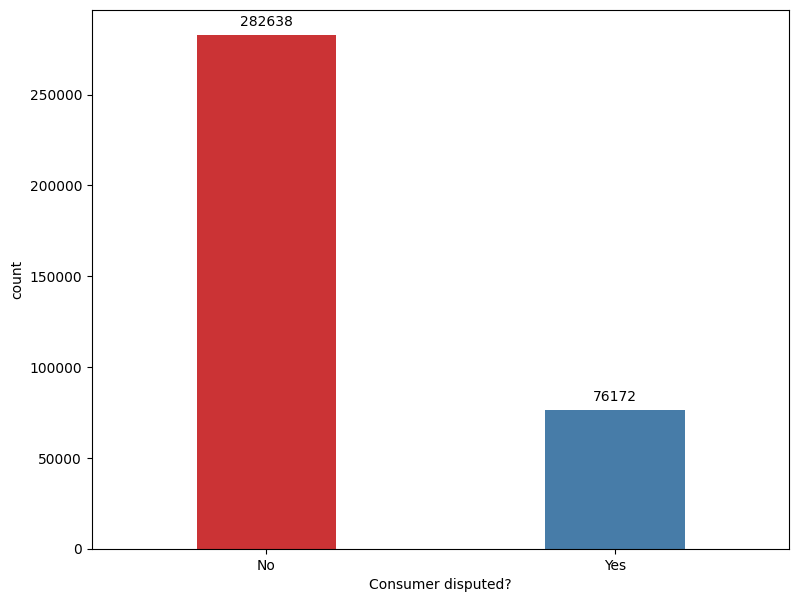

In [22]:
# Plot bar graph of the total no of disputes of consumers with the help of seaborn
plt.figure(figsize = (9, 7))
countplot = sns.countplot(x = train_labels,
                          hue = train_labels,
                          palette = 'Set1',
                          width = 0.4)

# Add counts on top of each bar
for p in countplot.patches:
    countplot.annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 10),
                       textcoords = 'offset points')

plt.show()

### Plot bar graph of the total no of disputes products-wise with the help of seaborn

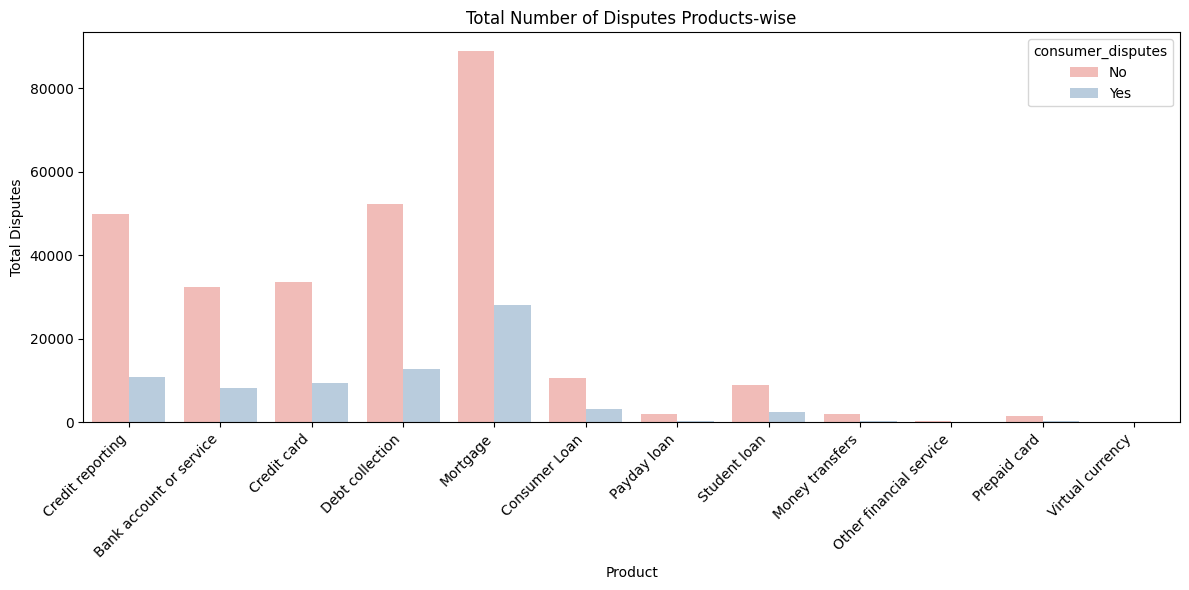

In [23]:
# Plot bar graph using Seaborn
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Product', hue = 'consumer_disputes', data=consumer_data_train, palette='Pastel1')
plt.title('Total Number of Disputes Products-wise')
plt.xlabel('Product')
plt.ylabel('Total Disputes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Plot bar graph of the total no of disputes with Top Issues by Highest Disputes, with the help of seaborn

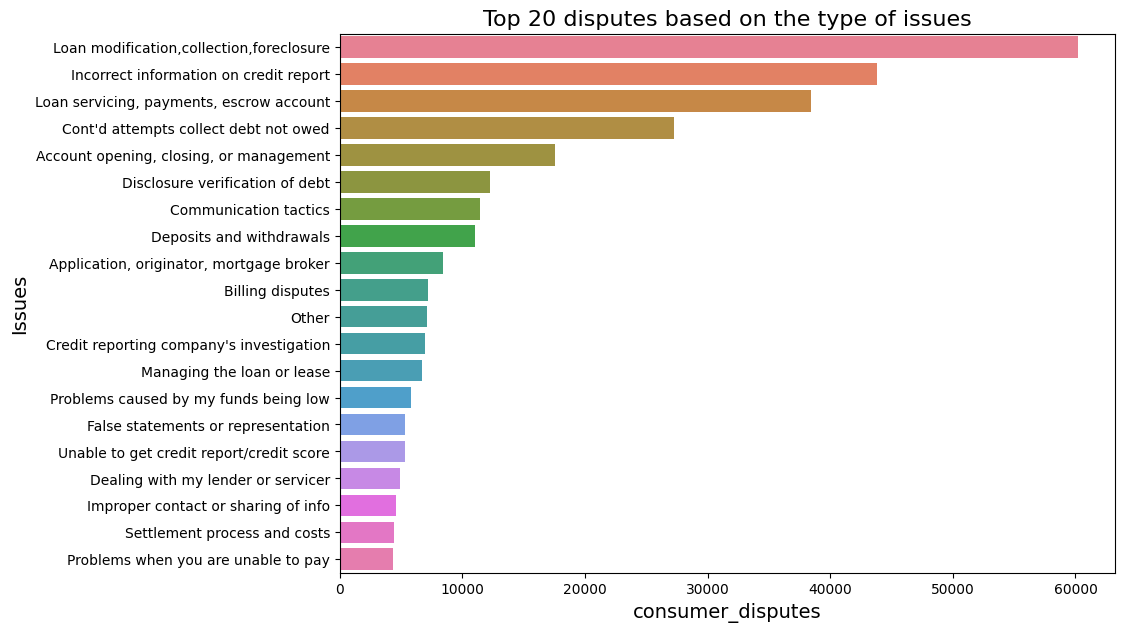

In [24]:
# Plot bar graph of the total no of disputes with Top Issues by Highest Disputes, with the help of seaborn
disputes_by_issues = pd.DataFrame(consumer_data_train.groupby('Issue')['consumer_disputes'].count().sort_values(ascending = False)).head(20)

plt.figure(figsize = (10,7))
sns.barplot(x = disputes_by_issues['consumer_disputes'],
            y = disputes_by_issues.index,
            hue = disputes_by_issues.index)
plt.xlabel('consumer_disputes', fontsize = 14)
plt.ylabel('Issues', fontsize = 14)
plt.title('Top 20 disputes based on the type of issues', fontsize = 16)
plt.show()

### Plot bar graph of the total no of disputes by State with Maximum Disputes

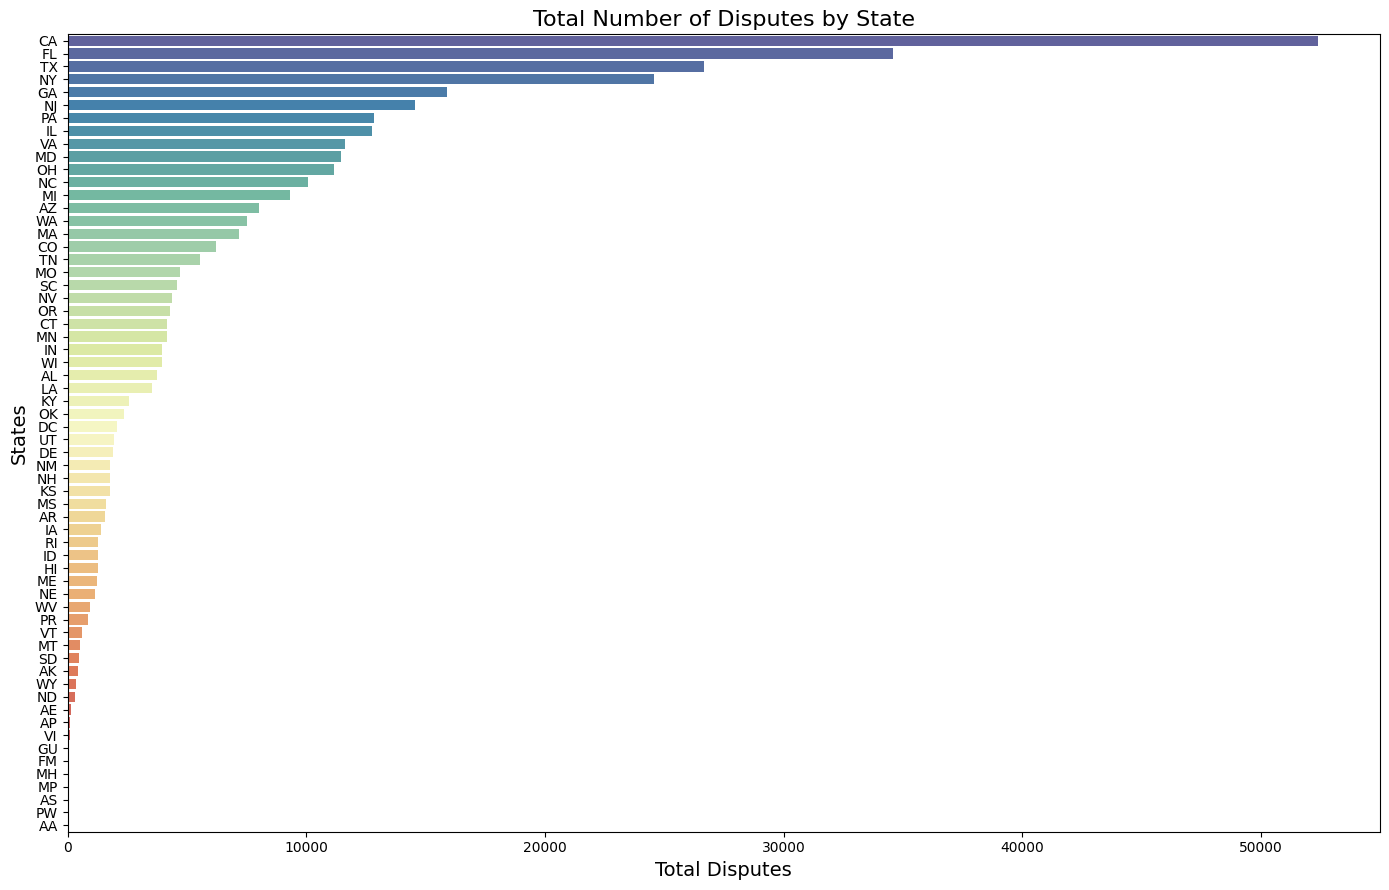

In [25]:
# Plot bar graph of the total no of disputes by State with Maximum Disputes
disputes_by_state = pd.DataFrame(consumer_data_train.groupby('State')['consumer_disputes'].count().sort_values(ascending = False))

plt.figure(figsize=(14, 9))
sns.barplot(x=disputes_by_state['consumer_disputes'],
            y=disputes_by_state.index,
            hue=disputes_by_state.index,
            palette='Spectral_r',
            legend=False)
plt.xlabel('Total Disputes', fontsize=14)
plt.ylabel('States', fontsize=14)
plt.title('Total Number of Disputes by State', fontsize=16)
plt.tight_layout()
plt.show()

### Plot bar graph of the total no of disputes Submitted Via different source

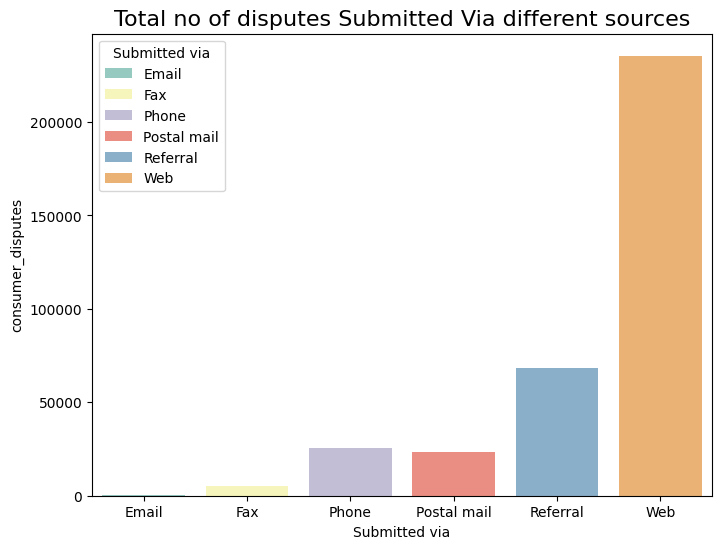

In [26]:
# Plot bar graph of the total no of disputes Submitted Via different sources
disputes_by_sources = pd.DataFrame(consumer_data_train.groupby('Submitted via')['consumer_disputes'].count())

plt.figure(figsize = (8,6))
sns.barplot(y = disputes_by_sources['consumer_disputes'],
            x = disputes_by_sources.index,
            hue = disputes_by_sources.index,
            palette = 'Set3',
            legend = True)
plt.title('Total no of disputes Submitted Via different sources', fontsize=16)
plt.show()

### Plot bar graph of the total no of disputes where the Company's Response to the Complaints

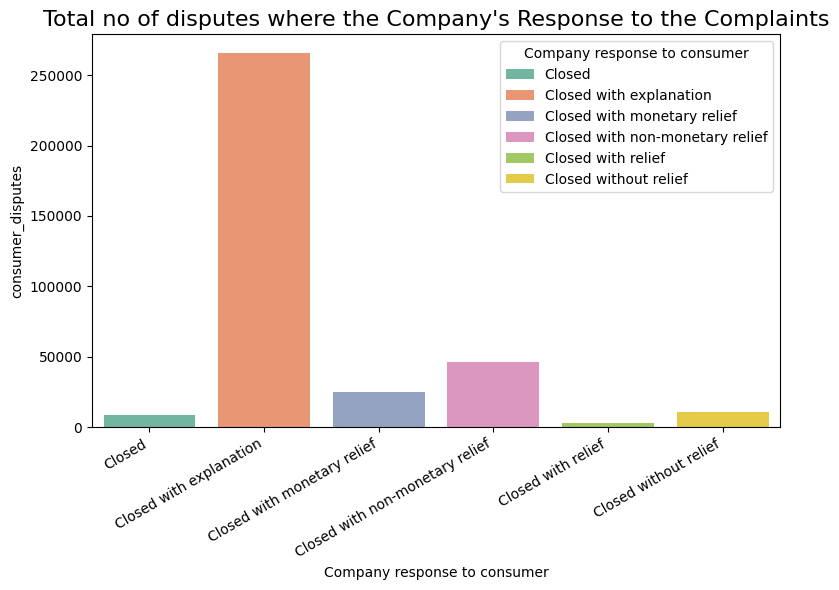

In [27]:
# Plot bar graph of the total no of disputes where the Company's Response to the Complaints
disputes_by_response = pd.DataFrame(consumer_data_train.groupby('Company response to consumer')['consumer_disputes'].count())

plt.figure(figsize = (8,6))
sns.barplot(y = disputes_by_response['consumer_disputes'],
            x = disputes_by_response.index,
            hue = disputes_by_response.index,
            palette = 'Set2',
            legend = True)

plt.title("Total no of disputes where the Company's Response to the Complaints", fontsize = 16)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

### Plot bar graph of the total no of disputes where the Company's Response Leads to Disputes

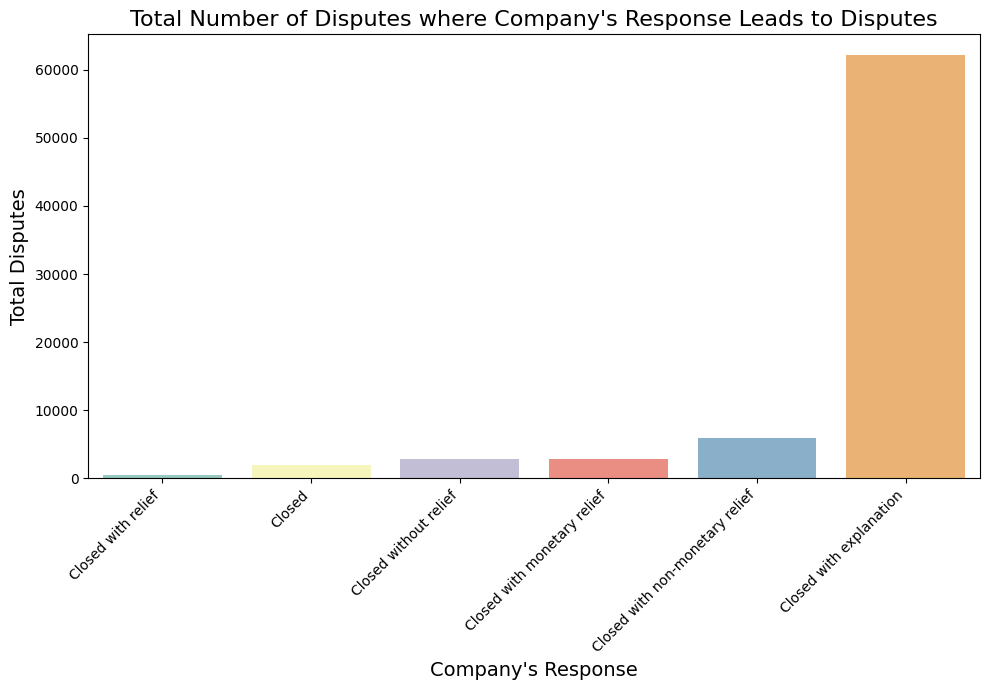

In [28]:
# Filter data where the company's response leads to disputes
response_leads_to_disputes = consumer_data_train[consumer_data_train['consumer_disputes'] == 'Yes'][['Company response to consumer', 'consumer_disputes']]

# Group data by company's response and count the number of disputes for each response
disputed_response = response_leads_to_disputes.groupby('Company response to consumer')['consumer_disputes'].count().sort_values()

# Plot bar graph using Seaborn
plt.figure(figsize=(10, 7))
sns.barplot(x = disputed_response.index,
            y = disputed_response.values,
            hue = disputed_response.index,
            palette='Set3')

plt.xlabel("Company's Response", fontsize=14)
plt.ylabel("Total Disputes", fontsize=14)
plt.title("Total Number of Disputes where Company's Response Leads to Disputes", fontsize=16)
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()

### Plot bar graph of the total no of disputes. Whether there are Disputes Instead of Timely Response

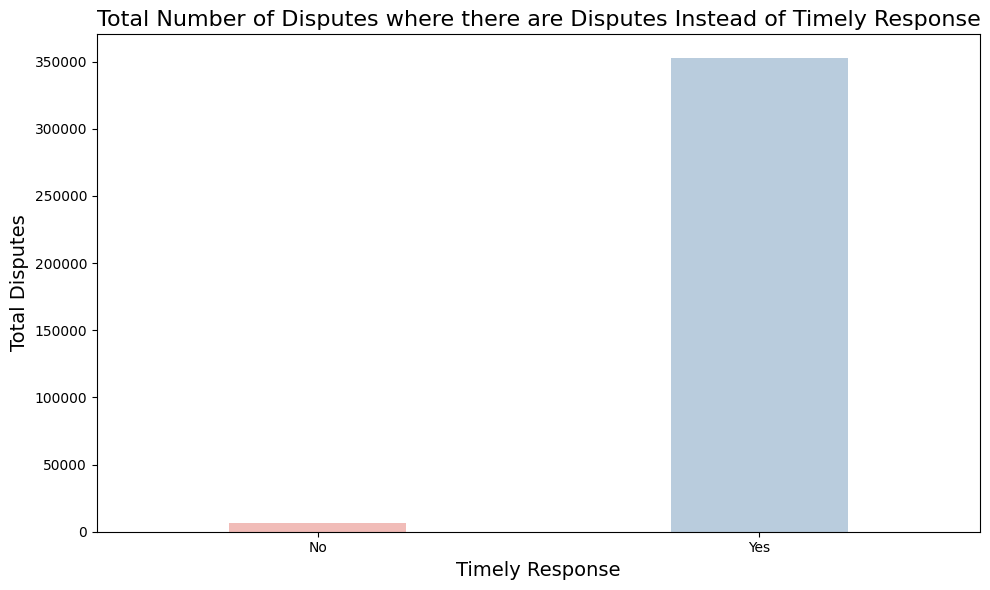

In [29]:
# Plot bar graph of the total no of disputes. Whether there are Disputes Instead of Timely Response
dispute_timely_response = consumer_data_train.groupby('Timely response?')['consumer_disputes'].count()

# Plot bar graph using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x = dispute_timely_response.index,
            y = dispute_timely_response.values,
            hue = dispute_timely_response.index,
            palette='Pastel1',
            width = 0.4)

plt.xlabel("Timely Response", fontsize=14)
plt.ylabel("Total Disputes", fontsize=14)
plt.title("Total Number of Disputes where there are Disputes Instead of Timely Response", fontsize=16)
plt.tight_layout()
plt.show()

### Plot bar graph of the total no of disputes over Year Wise Complaints

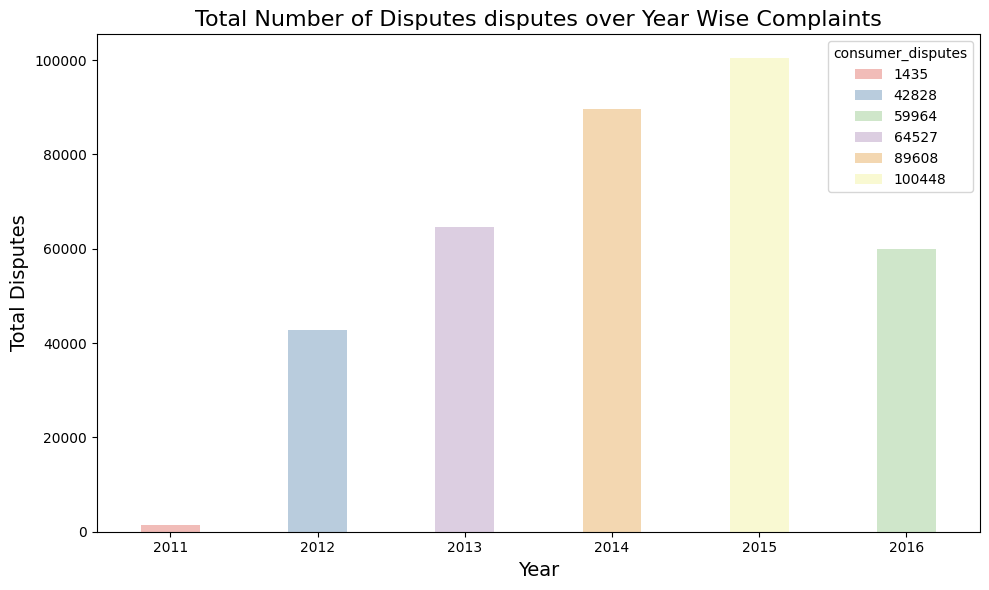

In [30]:
# Plot bar graph of the total no of disputes over Year Wise Complaints
year_wise_disputes = pd.DataFrame(consumer_data_train.groupby(['Year'])['consumer_disputes'].count())

# Plot bar graph using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x = year_wise_disputes.index,
            y = year_wise_disputes['consumer_disputes'],
            hue = year_wise_disputes['consumer_disputes'],
            palette='Pastel1',
            width = 0.4)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Disputes", fontsize=14)
plt.title("Total Number of Disputes disputes over Year Wise Complaints", fontsize=16)
plt.tight_layout()
plt.show()

### Plot bar graph of Top Companies with Highest Complaints

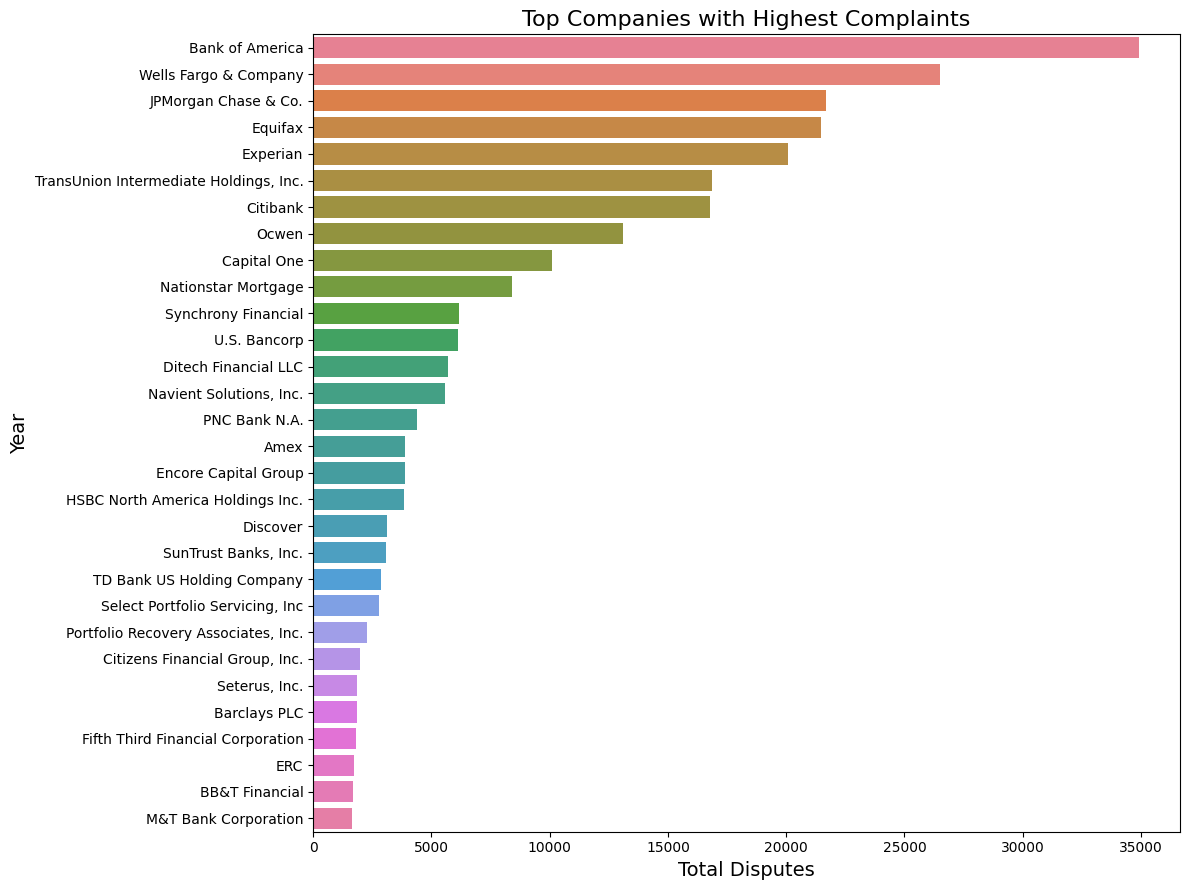

In [31]:
# Plot bar graph of Top Companies with Highest Complaints
companies_highest_complaints = pd.DataFrame(consumer_data_train.groupby('Company')['consumer_disputes'].count().sort_values(ascending = False)).head(30)

plt.figure(figsize = (12, 9))
sns.barplot(y = companies_highest_complaints.index,
            x = companies_highest_complaints['consumer_disputes'],
            hue = companies_highest_complaints.index)

plt.xlabel("Total Disputes", fontsize=14)
plt.ylabel("Year", fontsize=14)
plt.title("Top Companies with Highest Complaints", fontsize=16)
plt.tight_layout()
plt.show()

### Converte all negative days held to zero (it is the time taken by the authority that can't be negative)

In [32]:
# Converte all negative days held to zero (it is the time taken by the authority that can't be negative)
train_data.loc[train_data['Days held'] < 0, 'Days held'] = 0

In [33]:
# Drop Unnecessary Columns for the Model Building like:'Company', 'State', 'Year_Received', 'Days_held'
train_data.drop(['Company', 'State', 'Year', 'Days held'], axis  = 1 , inplace = True)
test_data.drop(['Company', 'State', 'Year', 'Days held'], axis  = 1 , inplace = True)
test_data.head()

,Product,Issue,Submitted via,Company response to consumer,Timely response?,Day,Month,Week received
0,TX,Credit card,Web,Closed with monetary relief,Yes,17,1,3
1,TX,Consumer Loan,Phone,Closed with explanation,Yes,22,6,4
2,NC,Credit card,Web,Closed with explanation,Yes,4,9,1
3,MO,Consumer Loan,Web,Closed with non-monetary relief,Yes,17,5,3
4,SC,Debt collection,Web,Closed with explanation,Yes,7,7,1


### Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)

In [34]:
# Replace 'Yes' with 1 and 'No' with 0 in the 'Consumer Disputed' column
train_labels = train_labels.replace({'Yes': 1, 'No': 0})
train_labels

0         0
1         1
2         0
3         0
4         1
         ..
358805    0
358806    0
358807    1
358808    0
358809    0
Name: Consumer disputed?, Length: 358810, dtype: int64

### Create Dummy Variables for categorical features and concat with the original data frame like: 'Product,’ 'Submitted via,’ 'Company response to consumer,’ 'Timely response?'

In [35]:
# Specify categorical features for which dummy variables need to be created
categorical_features = ['Product', 'Issue', 'Submitted via', 'Company response to consumer', 'Timely response?']

# Create dummy variables for categorical features
train_data = pd.get_dummies(train_data, columns = categorical_features)
test_data = pd.get_dummies(test_data, columns = categorical_features)

train_data.head()

,Day,Month,Week received,Product_AA,Product_AE,Product_AK,Product_AL,Product_AP,Product_AR,Product_AS,...,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_No,Timely response?_Yes
0,14,10,2,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,26,4,4,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,20,12,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,3,3,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,30,1,5,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


### Scaling the Data Sets and Make feature Selection with the help of PCA up to 80% of the information.

In [72]:
test_data.head()

,Day,Month,Week received,Product_AA,Product_AE,Product_AK,Product_AL,Product_AP,Product_AR,Product_AS,...,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_No,Timely response?_Yes
0,17,1,3,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,22,6,4,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,4,9,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,17,5,3,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,7,7,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [73]:
# Scale the data before feature selection
sc = StandardScaler()
train_data_scaled = sc.fit_transform(train_data)
test_data_scaled = sc.transform(test_data)

# Perform data selction on the transformed features with 80% information
pca_data = PCA(n_components = 0.80,
               random_state = 42)

trained_pca = pca_data.fit_transform(train_data_scaled)
test_pca = pca_data.transform(test_data_scaled)

# Create a dataframe to view the selected features
train_data_pca = pd.DataFrame(data = trained_pca,
                              columns = [f"PC{i + 1}" for i in range(trained_pca.shape[1])])

In [37]:
train_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66
0,0.871518,-0.940682,-0.028886,-1.259134,0.860228,0.334098,-0.720606,-0.325713,-1.050520,0.930608,...,-0.060245,0.023392,0.030512,-0.048325,0.044719,-0.060980,-0.022368,-0.018653,0.001173,-0.063897
1,-0.042780,0.086777,-1.587105,0.360250,-0.946977,0.707135,0.188223,-0.675882,-1.342592,1.003048,...,-0.029939,0.105063,-0.068074,-0.077891,0.109328,-0.002025,-0.001143,-0.015131,0.013798,-0.174904
2,-0.263929,-1.065572,0.494017,2.665930,0.248307,1.524024,0.761936,0.920110,2.377289,1.037390,...,-0.121152,0.226029,-0.452201,-0.443408,0.094595,-0.324033,-0.163990,0.116728,0.002162,-0.237388
3,-0.903376,0.737816,1.676180,-0.983404,-0.093169,0.760972,1.504888,-1.100951,0.897816,-0.298390,...,-0.003627,0.109721,-0.007913,0.134886,-0.003914,-0.063811,-0.026081,0.006677,-0.122664,0.155850
4,1.227314,0.266366,-2.634128,0.084317,-0.540697,-0.328982,1.346055,1.835928,0.421801,-1.384799,...,0.065911,0.086919,-0.040586,-0.068365,0.035607,-0.019376,-0.011671,-0.007323,-0.023124,-0.049512


In [38]:
# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data_pca,
                                                  train_labels,
                                                  test_size = 0.2,
                                                  random_state = 42)
len(X_train), len(y_train), len(X_val), len(y_val)

(287048, 287048, 71762, 71762)

### Build given models and measure their test and validation accuracy:
- LogisticRegression

- DecisionTreeClassifier

- RandomForestClassifier

- AdaBoostClassifier

- GradientBoostingClassifier

- KNeighborsClassifier

- XGBClassifier

In [45]:
# Lets make a dictionary of classifiers and make predictions
classifiers = {
    'Logistic Regression Classifier' : LogisticRegression(solver = 'sag', random_state = 42, n_jobs = -1),
    'Decision Tree Classifier' : DecisionTreeClassifier(criterion = 'entropy', splitter = 'random', random_state = 42),
    'Random Forest Classifier' : RandomForestClassifier(n_estimators = 150, random_state = 42, n_jobs = -1),
    'Adaboost Classifier' : AdaBoostClassifier(estimator = DecisionTreeClassifier(), n_estimators = 100, random_state = 42),
    'Gradient Boosting Classifier' : GradientBoostingClassifier(max_depth = 8, random_state = 42),
    'Kneighbor Classifier' : KNeighborsClassifier(n_neighbors = 15, n_jobs = -1),
    'Xgboost Classifier' : XGBClassifier()}

accuracies = {}

# Run a loop and fit the classifiers
for name, classifier in classifiers.items():

  # Fit the model on the training data
  classifier.fit(X_train, y_train)

  # Make some predictions
  y_preds = classifier.predict(X_val)

  # Find the accuracy score
  accuracy = accuracy_score(y_true = y_val,
                            y_pred = y_preds)

  # Append the accuracy values to dictionary
  accuracies[name] = accuracy

In [55]:
# Select the most accurate classifier based on validation accuracy
best_classifier_name = max(accuracies, key=lambda k: accuracies[k])
best_classifier = classifiers[best_classifier_name]
best_classifier

LogisticRegression(n_jobs=-1, random_state=42, solver='sag')

In [80]:
# Train the selected classifier on the entire training data
best_classifier.fit(train_data_pca, train_labels)

# Predict the outcome for the test file
consumer_data_test['Consumer disputed?'] = best_classifier.predict(test_pca)

# Save the updated test file
consumer_data_test.to_csv('test_data_predicted.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [106]:
consumer_data_test.sample(10)

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Day,Month,Year,Days held,Consumer disputed?
71356,Student loan,Problems when you are unable to pay,"Navient Solutions, Inc.",NY,Web,Closed without relief,Yes,9,3,2012,0,0
84674,Mortgage,"Loan modification,collection,foreclosure",Ocwen,IL,Web,Closed with explanation,Yes,15,1,2013,275,0
82474,Credit card,Other,Arvest Bank,OK,Web,Closed with explanation,Yes,24,9,2015,0,0
70307,Mortgage,"Application, originator, mortgage broker",Wells Fargo & Company,PA,Web,Closed without relief,Yes,16,5,2012,1,0
57629,Mortgage,"Loan servicing, payments, escrow account",BMO Harris,OH,Phone,Closed with explanation,Yes,27,3,2014,4,0
7850,Mortgage,"Loan modification,collection,foreclosure",JPMorgan Chase & Co.,TX,Phone,Closed with explanation,Yes,4,3,2016,0,0
104408,Debt collection,Improper contact or sharing of info,"OneMain Financial Holdings, LLC",NJ,Web,Closed with non-monetary relief,Yes,3,5,2016,0,0
61973,Bank account or service,"Account opening, closing, or management",Citibank,VA,Web,Closed with non-monetary relief,Yes,17,6,2016,0,0
28713,Debt collection,Taking/threatening an illegal action,Encore Capital Group,TX,Web,Closed with explanation,Yes,26,2,2015,0,0
53537,Consumer Loan,Problems when you are unable to pay,Wells Fargo & Company,TN,Web,Closed with explanation,Yes,3,4,2013,1,0


In [107]:
consumer_data_test['Consumer disputed?'].value_counts()

0    119600
1         6
Name: Consumer disputed?, dtype: int64